<a href="https://colab.research.google.com/github/etay-atar/machine_learning/blob/main/Predict_SandP500_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Next-Day S&P 500 Movements with Machine Learning

#Researcher: **Etay Atar**

The goal is to build and evaluate a machine learning model that predicts tomorrow’s S&P 500 price direction (up or down) based on more than 20 years of historical market data.

**Objective**

Develop an end-to-end pipeline for time-series prediction of the S&P 500 index.

Focus on daily next-day forecasting (classification: up vs. down).

Evaluate predictive performance both with machine learning metrics (accuracy, AUC) and trading strategy metrics (CAGR, Sharpe ratio, drawdowns).

Ensure robust testing using walk-forward backtesting, which mimics real-world trading conditions and prevents lookahead bias.


**Research Question**

Step 1 — Forecasting:
“Can machine learning models accurately predict the next-day movement of the S&P 500 index based on historical price data and technical indicators?”

Step 2 — Trading:
“If such predictions are used in a simple trading strategy (via the SPY ETF), would the strategy generate consistent profits after accounting for transaction costs and market frictions?”

Start with Data collection:


In [ ]:
#Downloading the s&p 500 price data
import yfinance as yf

In [ ]:
#Download the price history for the ticker GSPC (The S&P 500 index)
sp500 = yf.Ticker("^GSPC")

In [ ]:
#Query all data from the creation of the index
sp500 = sp500.history(period="max")

In [ ]:
#Display the data
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,0.0,0.0
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,0.0,0.0
2025-09-17 00:00:00-04:00,6604.870117,6624.390137,6551.149902,6600.350098,5805340000,0.0,0.0


In [ ]:
#Check the dataframe
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24546 entries, 1927-12-30 00:00:00-05:00 to 2025-09-19 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24546 non-null  float64
 1   High          24546 non-null  float64
 2   Low           24546 non-null  float64
 3   Close         24546 non-null  float64
 4   Volume        24546 non-null  int64  
 5   Dividends     24546 non-null  float64
 6   Stock Splits  24546 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [ ]:
#Try another ticker with interday prices
sp500_SPY = yf.Ticker("SPY")
sp500_SPY = sp500_SPY.history(period="max")
sp500_SPY

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.330326,24.330326,24.209280,24.313034,1003200,0.000,0.0,0.0
1993-02-01 00:00:00-05:00,24.330323,24.485954,24.330323,24.485954,480500,0.000,0.0,0.0
1993-02-02 00:00:00-05:00,24.468674,24.555136,24.416797,24.537844,201300,0.000,0.0,0.0
1993-02-03 00:00:00-05:00,24.572437,24.814530,24.555144,24.797237,529400,0.000,0.0,0.0
1993-02-04 00:00:00-05:00,24.883672,24.952842,24.606995,24.900965,531500,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,657.816255,659.212348,657.517097,659.082703,63772400,0.000,0.0,0.0
2025-09-16 00:00:00-04:00,659.641138,659.950340,657.387438,658.175232,61169000,0.000,0.0,0.0
2025-09-17 00:00:00-04:00,658.185266,659.890500,652.491031,657.357544,101952200,0.000,0.0,0.0


In [ ]:
#Check the dataframe
sp500_SPY.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8217 entries, 1993-01-29 00:00:00-05:00 to 2025-09-19 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           8217 non-null   float64
 1   High           8217 non-null   float64
 2   Low            8217 non-null   float64
 3   Close          8217 non-null   float64
 4   Volume         8217 non-null   int64  
 5   Dividends      8217 non-null   float64
 6   Stock Splits   8217 non-null   float64
 7   Capital Gains  8217 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 577.8 KB


The data from both tickers fit two different goals
1. **Forecasting goal → ^GSPC**

Question: “Can I predict whether the S&P 500 will go up or down tomorrow?”

Focus: prediction accuracy (ML metrics like accuracy, AUC, etc.).

Data: index values only (no dividends, no real trading possible).

Outcome: I will know how well my model forecasts the market’s movement.

it's like a weather forecast  — only care about whether the prediction matches reality.

2. **Trading goal → SPY**

Question: “If I trade my predictions with real money, will I make a profit?”

Focus: profitability (PnL, CAGR, Sharpe ratio, drawdowns, after costs).

Data: ETF prices (OHLCV), dividends, transaction costs.

Outcome: see how much money I would (or wouldn’t) make in practice.

it's like running a business simulation — you care about actual money, not just being “right.”

________________________________________________________________________

My goal now is modeling the market itself (long history, more comprehensive), so i will stick with ^GSPC

**Data Analysis:**

In [13]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [10]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-09-08 00:00:00-04:00', '2025-09-09 00:00:00-04:00',
               '2025-09-10 00:00:00-04:00', '2025-09-11 00:00:00-04:00',
               '2025-09-12 00:00:00-04:00', '2025-09-15 00:00:00-04:00',
               '2025-09-16 00:00:00-04:00', '2025-09-17 00:00:00-04:00',
               '2025-09-18 00:00:00-04:00', '2025-09-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24546, freq=None)

<Axes: xlabel='Date'>

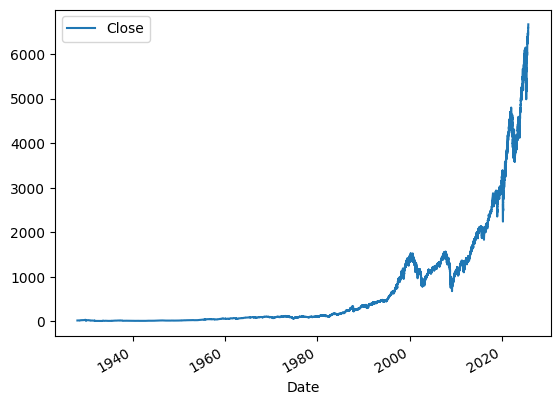

In [15]:
# Chart of the snp500 price history
sp500.plot(y="Close", use_index=True)

**Data cleaning:**

In [16]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [17]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24546 entries, 1927-12-30 00:00:00-05:00 to 2025-09-19 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24546 non-null  float64
 1   High    24546 non-null  float64
 2   Low     24546 non-null  float64
 3   Close   24546 non-null  float64
 4   Volume  24546 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


Set the target (that i am going to be predicting using machine learning) - so it's will the price go up or down tomorrow

why not predict the price ? because i care on getting accurate on the directionallity or the movment of the market (UP or DOWN).
i can be vary accurate predicting the price but still lose money on the long run

In [20]:
#I Take all the close prices and move them back by one day, so the price of the next day is there.
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,6600.350098
2025-09-17 00:00:00-04:00,6604.870117,6624.390137,6551.149902,6600.350098,5805340000,6631.959961


In [23]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766,0
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,6600.350098,0
2025-09-17 00:00:00-04:00,6604.870117,6624.390137,6551.149902,6600.350098,5805340000,6631.959961,1


In [26]:
#Remove all market data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,6603.490234,6619.620117,6602.069824,6615.279785,5045020000,6606.759766,0
2025-09-16 00:00:00-04:00,6624.129883,6626.990234,6600.109863,6606.759766,5359510000,6600.350098,0
2025-09-17 00:00:00-04:00,6604.870117,6624.390137,6551.149902,6600.350098,5805340000,6631.959961,1


**Training an initial machine learning model:**

i will use Random forest classifier -> this is what ChatGPT had to say about it:

Random Forest Classifier for Initial Training

Why it’s good for a start

Handles non-linear relationships automatically.

Works well with mixed feature types (lags, technical indicators, calendar features).

Doesn’t need heavy preprocessing (no scaling, can handle missing values fairly well).

Easy to train and interpret (feature importance).

Caveats

Trees don’t extrapolate well → they only learn patterns from historical splits.

Can overfit if you don’t restrict depth/trees.

Often less powerful than gradient boosting (XGBoost/LightGBM) on tabular financial data.


my reasons for picking this classifier:
1. resistent to overfitting (to a certin degree)
2. run fast
3. can opickup non linear tendencies in the data: for example, there is no linear relationship between the opening price and the taget

In [28]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators=100 -> the number of individual decision trees i want to train, the higer the number is the better the accuracy (up to a limit)
#min_samples_split=100 -> help me protect against overfitting in the decision trees, the higer the less accurate but also less overfitting
#random_state=1 ->if i run the same model twice, i will get the same results
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split my data into a test and train
"""
Beacuse this is TimeSeries data i can't use cross validation, beacuse it dosent take the TimeSeries data into consideration in the model
so i will affactivly be using future data to predict, and this is not good.
"""

#simple baseline, later i will spilt more wisely
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

#fitting the model
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Now i will mesure how acurate my model is:

"What precentage of the time the model said the market will go up, did it actually go up"

In [30]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [35]:
import pandas as pd

preds = pd.Series(preds, index=test.index)


In [36]:
preds

,0
Date,
2025-04-29 00:00:00-04:00,1
2025-04-30 00:00:00-04:00,1
2025-05-01 00:00:00-04:00,1
2025-05-02 00:00:00-04:00,1
2025-05-05 00:00:00-04:00,1
...,...
2025-09-15 00:00:00-04:00,0
2025-09-16 00:00:00-04:00,0
2025-09-17 00:00:00-04:00,0


In [ ]:
#calculate the precision score

In [37]:
precision_score(test["Target"], preds)

0.6052631578947368